# Lab 7: Exploring Crime events with Spark DataFrames

We have pre-loaded the crime dataset into HIVE on Hadoop, so you can explore it using Spark with Hive. First, please create a Spark Context and HiveContext, and set the default database to "demo"

In [1]:
# Set up Spark Context
from pyspark import SparkContext, SparkConf

SparkContext.setSystemProperty('spark.executor.memory', '2g')
conf = SparkConf()
conf.set('spark.executor.instances', 15)
sc = SparkContext('yarn-client', 'Spark-lab7', conf=conf)

from pyspark.sql import HiveContext
hc = HiveContext(sc)
hc.sql("use demo")

DataFrame[result: string]

Use Spark SQL to create a Pandas dataframe that computes the number of crimes per category:
* Use sql() and a SQL statement to compute the crimes per category, sorted in descending order. 
* Store the result as a Pandas dataframe.
* Display the top-20 results
* Plot the top-20 categories as a bar chart

,count
category,
LARCENY/THEFT,348523
OTHER OFFENSES,251180
NON-CRIMINAL,183911
ASSAULT,153485
DRUG/NARCOTIC,107653
VEHICLE THEFT,107112
VANDALISM,89282
WARRANTS,83919
BURGLARY,73539


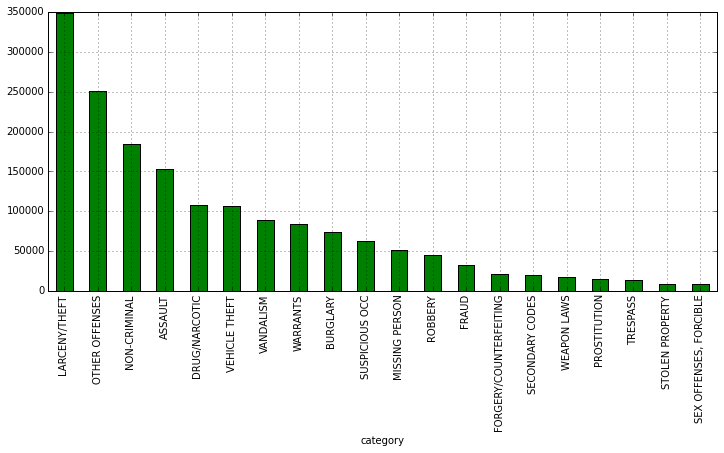

In [2]:
cvals = hc.sql("SELECT category, COUNT(*) as count FROM demo.crimes GROUP by category ORDER BY count DESC")
df = cvals.toPandas().set_index('category')
display(df[:20])
df[:20].plot(kind='bar', figsize=(12,5), legend=False, color='green')

Compute the number of crimes per district, but this time using DataFrame API transformations:
* load the table from spark as a Data Frame, using table()
* use groupBy() to count the number of crimes per district
* Sort the result in descening order. 
* Print the result
* Plot the result as a bar chart

,count
district,
SOUTHERN,312530
MISSION,238929
NORTHERN,210807
BAYVIEW,177955
CENTRAL,170113
TENDERLOIN,162724
INGLESIDE,157816
TARAVAL,131149
PARK,98712


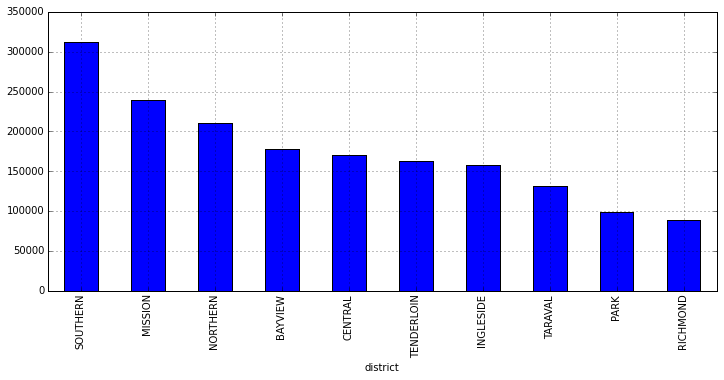

In [3]:
c1 = hc.table('crimes')
c2 = c1.groupBy('district').count().toPandas()
df = c2.sort(columns = ['count'], ascending=False, inplace=False).set_index('district')

display(df)
df.plot(kind='bar', figsize=(12,5), legend=False, color='blue')

Now compute the number of crimes by hour of the day:
* Use "withColumn" to add an "hour" column, computed from the "time" column with Python string slicing
* use groupBy as before to count by hour
* Sort by hour and then print/plot the results

,count
hour,
00,90527
01,52164
02,44030
03,27765
04,19521
05,17205
06,26225
07,44171
08,65910


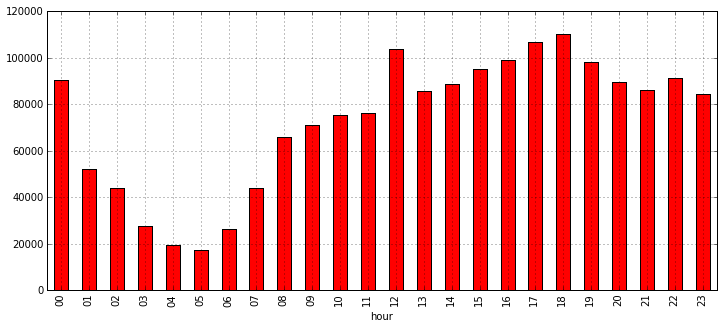

In [4]:
c1 = hc.table('crimes')
c2 = c1.withColumn('hour', c1.time[:2]).groupBy('hour').count().toPandas()
df = c2.sort(columns = ['hour'], ascending=True, inplace=False).set_index('hour')

display(df)
df.plot(kind='bar', figsize=(12,5), legend=False, color='red')

Let's explore the resolution of crimes, as described in the "resolution" field: 
* Count the number of events per "type of resolution". Consider "NONE" as an "unresolved" crime, and everything else as resolved.
* Print the number of crimes per resolution type. What are the two most common resolutions?

In [5]:
hc.table('crimes').groupBy('resolution').count().toPandas()

,resolution,count
0,LOCATED,34342
1,JUVENILE DIVERTED,682
2,"ARREST, CITED",153850
3,NOT PROSECUTED,7668
4,COMPLAINANT REFUSES TO PROSECUTE,8086
5,CLEARED-CONTACT JUVENILE FOR MORE INFO,442
6,JUVENILE CITED,6573
7,PROSECUTED FOR LESSER OFFENSE,82
8,EXCEPTIONAL CLEARANCE,3042
9,JUVENILE BOOKED,10939
